In [ ]:
!pip install pycbc
!git clone https://git.ligo.org/gwinc/inspiral-range.git
!pip install inspiral_range[lal]
!pip install gwpy

In [ ]:
!pip install matplotlib==3.1.1

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
%xmode Verbose

Exception reporting mode: Verbose


In [ ]:
from pycbc import waveform

In [ ]:
low_freq_cut = 5

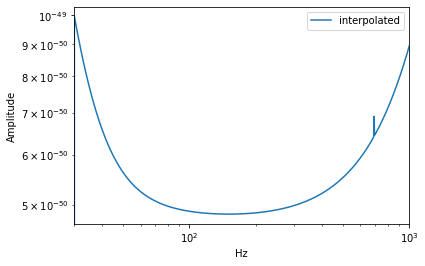

In [ ]:
import pycbc.psd
import pycbc.types
import pylab
import matplotlib.pyplot as plt

filename = '/content/inspiral-range/inspiral_range/test/CE2.txt'

# The PSD will be interpolated to the requested frequency spacing
delta_f = 1.0 / 4
length = int(1024 / delta_f)
low_frequency_cutoff = 30.0
psd = pycbc.psd.from_txt(filename, length, delta_f, low_frequency_cutoff, is_asd_file=False)
pylab.loglog(psd.sample_frequencies, psd, label='interpolated')

# The PSD will be read in without modification
#psd = pycbc.types.load_frequencyseries('/content/inspiral-range/inspiral_range/test/CE2.txt')
# pylab.loglog(psd.sample_frequencies, psd, label='raw')

pylab.xlim(xmin=30, xmax=1000)
pylab.legend()
pylab.xlabel('Hz')
pylab.ylabel('Amplitude')
pylab.show()

# Save a psd to file, several formats are supported (.txt, .hdf, .npy)
psd.save('ce2_psd.txt')

In [ ]:
# In order to calculate signal-to-noise ratio, we need a signal 
# model against which to compare our data. For this we import 
#pycbc.waveform.get_fd_waveform and generate a template as 
# a pycbc.types.FrequencySeries:
from pycbc.waveform import get_fd_waveform
reference_distance = 1000 # distance in Mp
CE2, _ = waveform.get_fd_waveform(approximant="IMRPhenomD_NRTidal", mass1=1.4, mass2=1.4, distance = 1000,
                        f_lower=low_freq_cut, delta_f=1)

(5, 10000)

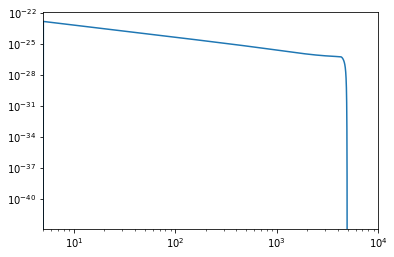

In [ ]:
#check that the waveform amplitude looks ok
plt.loglog(CE2.sample_frequencies,abs(CE2))
plt.xlim(low_freq_cut,10000)


In [ ]:
def waveform_power( waveform_model):
  return 4*np.abs(waveform_model)*np.abs(waveform_model)*waveform_model.sample_frequencies 
  # convention for plots against PSDs

In [ ]:
from pycbc import psd
CosmicExplorerPSD = psd.from_string('CosmicExplorerP1600143', len(CE2), CE2.delta_f,low_freq_cutoff=low_freq_cut)
AdvancedLIGOPlusPSD = psd.from_string('aLIGOAPlusDesignSensitivityT1800042', len(CE2), CE2.delta_f,low_freq_cutoff=low_freq_cut)
# Alternatively if you have a psd in an array, e.g. that you've plotted, then you can 
# use freq_data and noise_data
# psd.read.from_numpy_arrays(freq_data, noise_data, length, delta_f, low_freq_cutoff)

In [ ]:
# Cosmic explorer PSD only defined up to...
# will need to calculate sigma in defined frequency range
max_freq = CosmicExplorerPSD.sample_frequencies[-1] #last value
max_freq_APlus = AdvancedLIGOPlusPSD.sample_frequencies[-1] #last value

print(max_freq, max_freq_APlus)

8192.0 8192.0


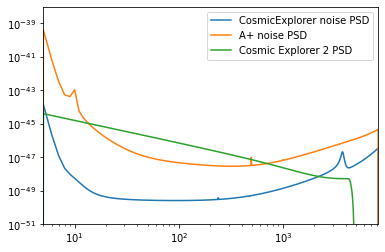

In [ ]:
# the PSD noise_data should have values around ten to the minus forty-something, 
# if it's twenty-something that's probably an ASD and you need to square it,
plt.loglog(CosmicExplorerPSD.sample_frequencies, CosmicExplorerPSD, label='CosmicExplorer noise PSD')
plt.loglog(AdvancedLIGOPlusPSD.sample_frequencies, AdvancedLIGOPlusPSD, label='A+ noise PSD')
plt.loglog(CE2.sample_frequencies, waveform_power(CE2), label='Cosmic Explorer 2 PSD')
plt.xlim(low_freq_cut,max_freq)
plt.ylim(1e-51,1e-38)
plt.legend()
plt.savefig('CE2PSD.png')

In [ ]:
from pycbc.filter.matchedfilter import sigma
reference_SNR = sigma(CE2, CosmicExplorerPSD,low_frequency_cutoff=low_freq_cut, high_frequency_cutoff=max_freq)
reference_SNR_Aplus = sigma(CE2, AdvancedLIGOPlusPSD,low_frequency_cutoff=low_freq_cut, high_frequency_cutoff=max_freq)

In [ ]:
print ("Horizon is ", reference_distance * reference_SNR / 8 ,"Mpc")
# SNR at a given distance scales inversly with distance
# so this gives the distance at which the SNR would be 8
# CAVEAT: IGNORES COSMOLOGY AND STUFF 
# shoot just realized once again that cosmology is tricky, dang expanding universe
# MAYBE JUST USE THE REFERENCE SNR AS A METRIC TO COMPARE BETWEEN DETECTORS 
# FOR NEARBY SIGNALS COSMOLOGY DOESN'T MATTER
print ("SNR of reference signal is", reference_SNR, "compared to", reference_SNR_Aplus,"in Cosmic Explorer 2")
print ("Cosmic Explorer gives SNR",reference_SNR/reference_SNR_Aplus ,"times greater." )

Horizon is  18682.896772711723 Mpc
SNR of reference signal is 149.46317418169377 compared to 6.109111411286769 in Cosmic Explorer 2
Cosmic Explorer gives SNR 24.465616047786593 times greater.


In [ ]:
#tidal signal model
tidal_model_1 , _ = waveform.get_fd_waveform(approximant="IMRPhenomD_NRTidal", 
                                        mass1=1.4, mass2=1.4, lambda1 = 200, lambda2=200,
                                        distance = 1000, # megaparsecs
                                        delta_f=1.0, f_lower=low_freq_cut)
tidal_model_2 , _ = waveform.get_fd_waveform(approximant="IMRPhenomD_NRTidal", 
                                        mass1=1.4, mass2=1.4, lambda1 = 400, lambda2=400,
                                        distance = 1000, # megaparsecs
                                        delta_f=1.0, f_lower=low_freq_cut)

In [ ]:
tidal_difference = tidal_model_1 - tidal_model_2
tidal_difference.resize(len(CE2))

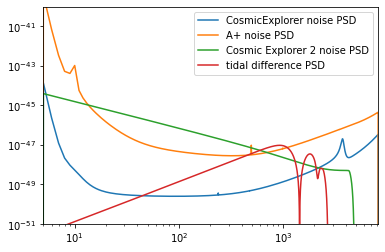

In [ ]:
# plot the PSDs for comparison 
plt.loglog(CosmicExplorerPSD.sample_frequencies, CosmicExplorerPSD, label='CosmicExplorer noise PSD')
plt.loglog(AdvancedLIGOPlusPSD.sample_frequencies, AdvancedLIGOPlusPSD, label='A+ noise PSD')
plt.loglog(CE2.sample_frequencies, waveform_power(CE2), label='Cosmic Explorer 2 noise PSD')
plt.loglog(tidal_difference.sample_frequencies, waveform_power(tidal_difference), label='tidal difference PSD')
plt.xlim(low_freq_cut,max_freq)
plt.ylim(1e-51,1e-40)
plt.legend()
plt.savefig('PSD comparison.png')

In [ ]:
reference_SNR = sigma(tidal_difference, CosmicExplorerPSD,low_frequency_cutoff=low_freq_cut, high_frequency_cutoff=max_freq)
reference_SNR_CE2 = sigma(tidal_difference, low_frequency_cutoff=low_freq_cut, high_frequency_cutoff=max_freq)

In [ ]:
print ("SNR of tidal signal is", reference_SNR, "compared to", reference_SNR_CE2,"in Cosmic Explorer 2")
print ("Cosmic Explorer gives SNR",reference_SNR/reference_SNR_CE2 ,"times greater." )

SNR of tidal signal is 11.052387283392914 compared to 3.0209077437555712e-24 in Cosmic Explorer 2
Cosmic Explorer gives SNR 3.658631186681876e+24 times greater.
